<a href="https://colab.research.google.com/github/EG-L/kaggle/blob/main/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.datasets import cifar10

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
print(X_train.shape,y_train.shape)

(50000, 32, 32, 3) (50000, 1)


In [6]:
print(X_test.shape,y_test.shape)

(10000, 32, 32, 3) (10000, 1)


In [7]:
import matplotlib.pyplot as plt

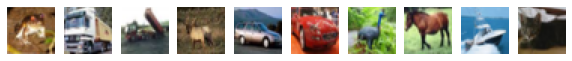

In [8]:
fig, ax = plt.subplots(1,10,figsize=(10,10))

for i in range(10):
  ax[i].imshow(X_train[i])
  ax[i].axis('off')
plt.show()

In [9]:
print([y_train[i] for i in range(10)])

[array([6], dtype=uint8), array([9], dtype=uint8), array([9], dtype=uint8), array([4], dtype=uint8), array([1], dtype=uint8), array([1], dtype=uint8), array([2], dtype=uint8), array([7], dtype=uint8), array([8], dtype=uint8), array([3], dtype=uint8)]


airplane - 0										
automobile - 1										
bird - 2										
cat - 3										
deer - 4										
dog - 5										
frog - 6										
horse - 7										
ship - 8										
truck - 9

In [10]:
import numpy as np

In [11]:
np.unique(y_train,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))

In [12]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range = 90, width_shift_range = 0.1,height_shift_range = 0.1, horizontal_flip = True)

datagen.fit(X_train)
# 데이터가 부족할 때 데이터를 여러 방면으로 돌려 데이터의 크기를 늘려주는 함수

In [13]:
from sklearn.preprocessing import StandardScaler
from keras.utils import np_utils

In [14]:
ss = StandardScaler()

In [15]:
X_train =  X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = ss.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test = ss.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Dense,BatchNormalization,Flatten
from tensorflow.keras import regularizers
model = Sequential()
model.add(Conv2D(32,(3,3),padding = 'same',kernel_regularizer=regularizers.L2(0.01),activation = 'relu',input_shape = X_train.shape[1:]))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding = 'same',kernel_regularizer=regularizers.L2(0.01),activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),padding = 'same',kernel_regularizer=regularizers.L2(0.01),activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding = 'same',kernel_regularizer=regularizers.L2(0.01),activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3),padding = 'same',kernel_regularizer=regularizers.L2(0.01),activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),padding = 'same',kernel_regularizer=regularizers.L2(0.01),activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

In [17]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
history = model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
1563/1563 [==============================] - 44s 9ms/step - loss: 3.5325 - accuracy: 0.4800 - val_loss: 1.8009 - val_accuracy: 0.6360
Epoch 2/100
1563/1563 [==============================] - 13s 8ms/step - loss: 1.7129 - accuracy: 0.6135 - val_loss: 1.5027 - val_accuracy: 0.6571
Epoch 3/100
1563/1563 [==============================] - 13s 8ms/step - loss: 1.4996 - accuracy: 0.6507 - val_loss: 1.4134 - val_accuracy: 0.6709
Epoch 4/100
1563/1563 [==============================] - 13s 8ms/step - loss: 1.4367 - accuracy: 0.6697 - val_loss: 1.4136 - val_accuracy: 0.6767
Epoch 5/100
1563/1563 [==============================] - 13s 9ms/step - loss: 1.4066 - accuracy: 0.6771 - val_loss: 1.4483 - val_accuracy: 0.6603
Epoch 6/100
1563/1563 [==============================] - 13s 8ms/step - loss: 1.3831 - accuracy: 0.6822 - val_loss: 1.3609 - val_accuracy: 0.6935
Epoch 7/100
1563/1563 [==============================] - 13s 8ms/step - loss: 1.3442 - accuracy: 0.6906 - val_loss: 1.3149 -

In [19]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9738 - accuracy: 0.7551


[0.9738473892211914, 0.7551000118255615]

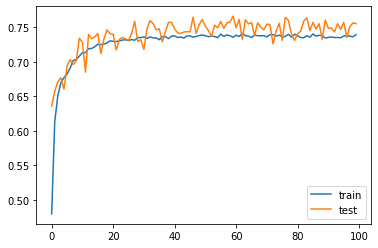

In [20]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train','test'])
plt.show()

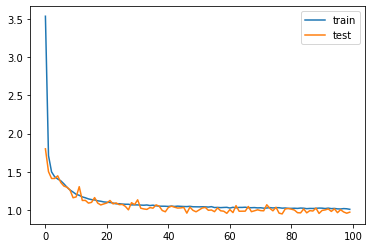

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','test'])
plt.show()